In [2]:
#import dependancies

import tensorflow as tf
import os
import matplotlib.pyplot as plt
import cv2 as cv

In [3]:
import cv2
import imghdr

In [5]:
data_dir= 'C:/Users/Pearry/NoteBooks/ImageClassification/Data/'

In [6]:
image_exts=['jpg','png','bmp','jpeg']

In [9]:
os.listdir(os.path.join(data_dir,'Audi cars'))

['0000954929_resized_audietronrange082021rsetrongt1022.jpg',
 '06819fd3-f02b-4181-ad11-b06c5111c966.jpg',
 '1-2020_audi_sq5_v_2020_bmw_7_series__1.jpg',
 '113415845.jpg',
 '114583892.jpg',
 '1920x1080-AUDI_X23_HERO_01.jpg',
 '1920x1080-desktop-models-teaser-A211437.jpg',
 '1920x1920-desktop-models-teaser-RSeGT_2021_2351_V1.jpg',
 '192px.svg',
 '196348-untitled-design-2022-08-23t130247032.jpg',
 '2000-Audi-A3-1_big.jpeg',
 '2020-Audi-RS7-Sportback-V1-1080.jpg',
 '2021.png',
 '20212.png',
 '20213.png',
 '20214.png',
 '20215.png',
 '2022-audi-q4-e-tron-102-1664419968.jpg',
 '2022-Audi-RS3-5.jpg',
 '2022.png',
 '20222.png',
 '2022_Audi_E-Tron_GT_RS_21.jpg',
 '2023.png',
 '20232.png',
 '2023_audi_a6_sedan_angularfront.jpg',
 '210810130708-embargo-restricted-01-audi-sky-sphere-concept.jpg',
 '210810130948-embargo-restricted-02-audi-sky-sphere-concept.jpg',
 '3-Audi-A3-cheapest-new-Audi-and-one-of-best-small-luxury-cars-Car-and-Driver.jpg',
 '37cb1792e5ce430db9d4623ae5d85f2b.jpg',
 '4474-Show

In [10]:
# loop through list of images for any with different extensions fromthe ones in the list and delete them
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        img_path=os.path.join(data_dir,image_class,image)
        try:
            img=cv2.imread(img_path)
            tip=imghdr.what(img_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(img_path))
                os.remove(img_path)
        except Exception as e:
            print('Issue with image {}'.format(img_path))

Image not in ext list C:/Users/Pearry/NoteBooks/ImageClassification/Data\Audi cars\113415845.jpg
Image not in ext list C:/Users/Pearry/NoteBooks/ImageClassification/Data\Audi cars\114583892.jpg
Image not in ext list C:/Users/Pearry/NoteBooks/ImageClassification/Data\Audi cars\1920x1080-AUDI_X23_HERO_01.jpg
Image not in ext list C:/Users/Pearry/NoteBooks/ImageClassification/Data\Audi cars\audi-activesphere-concept-2023.webp
Image not in ext list C:/Users/Pearry/NoteBooks/ImageClassification/Data\Audi cars\Audi-RS_Q8-2020-1280-b9.jpg
Image not in ext list C:/Users/Pearry/NoteBooks/ImageClassification/Data\Audi cars\R8_Coupe_V10_performance-1.jpg
Image not in ext list C:/Users/Pearry/NoteBooks/ImageClassification/Data\Audi cars\tt-final-1.jpg
Image not in ext list C:/Users/Pearry/NoteBooks/ImageClassification/Data\Mercedez Benz cars\a-1.jpg
Image not in ext list C:/Users/Pearry/NoteBooks/ImageClassification/Data\Mercedez Benz cars\Mercedes-Benz-C63_S_AMG_E_Performance-2023-1600-02-800x480

## LOAD DATA

In [12]:
tf.data.Dataset??

In [13]:
import numpy as np

In [15]:
data=tf.keras.utils.image_dataset_from_directory(data_dir)
data_iterator=data.as_numpy_iterator()

Found 631 files belonging to 2 classes.


In [95]:
data

<ShuffleDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [16]:
data_iterator

In [22]:
batch=data_iterator.next()

In [23]:
len(batch)

2

In [24]:
#images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [25]:
batch[1]

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1])

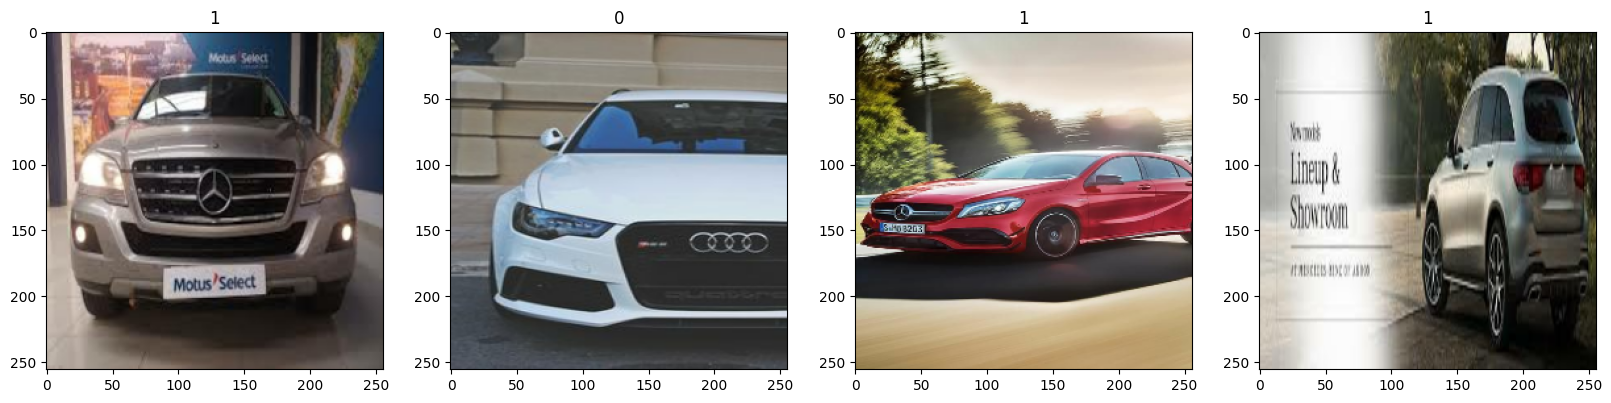

In [26]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

class 1--->Mercedez Benz

class 2---> Audi

## Preprocess Data

In [28]:
data=data.map(lambda x,y: (x/255,y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [31]:
data_scaled_iter=data.as_numpy_iterator()

In [33]:
batch=data_scaled_iter.next()

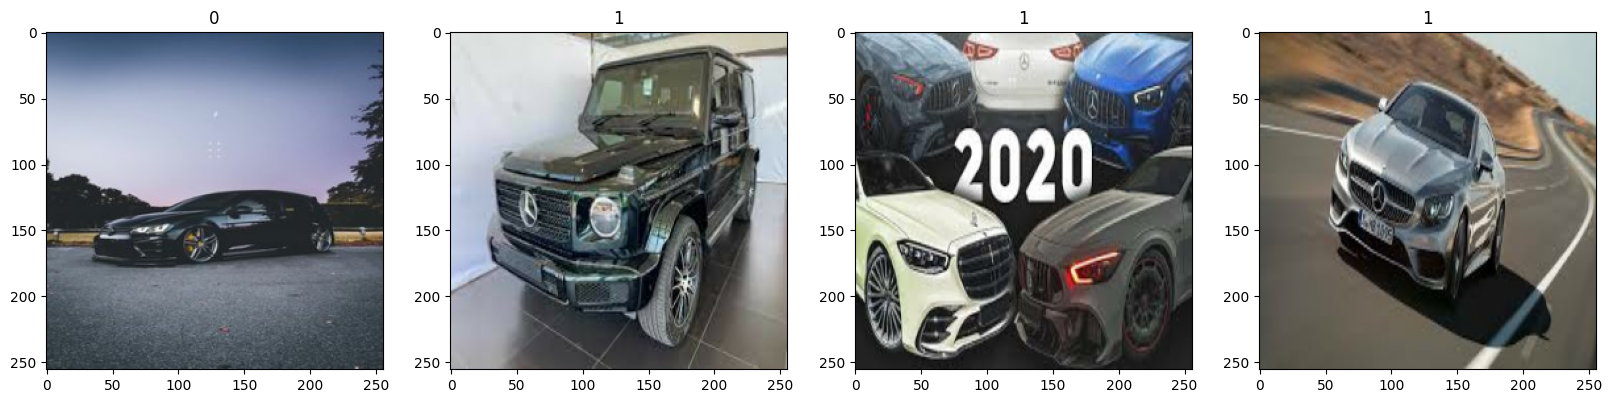

In [34]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [36]:
batch[0].min()

0.0

# SPLIT Data

In [37]:
train_size=int(len(data)*.7)
test_size=int(len(data)*.1)+1
val_size=int(len(data)*.2)+1

In [39]:
data=data.shuffle(631)

In [41]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

# Deep Learning

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,ReLU,MaxPooling2D,Dense,Flatten,Dropout

In [44]:
model=Sequential()

In [46]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [53]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 16)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 123008)            0

**Train**

In [55]:
logdir='C:/Users/Pearry/NoteBooks/logs/'

In [56]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [57]:
hist=model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
14/14 [==============================] - 245s 9s/step - loss: 1.7692 - accuracy: 0.5112 - val_loss: 0.6152 - val_accuracy: 0.6375
Epoch 2/20
14/14 [==============================] - 147s 9s/step - loss: 0.5972 - accuracy: 0.6856 - val_loss: 0.5102 - val_accuracy: 0.7937
Epoch 3/20
14/14 [==============================] - 166s 11s/step - loss: 0.4595 - accuracy: 0.7904 - val_loss: 0.3548 - val_accuracy: 0.8742
Epoch 4/20
14/14 [==============================] - 197s 9s/step - loss: 0.3330 - accuracy: 0.8702 - val_loss: 0.3267 - val_accuracy: 0.8375
Epoch 5/20
14/14 [==============================] - 83s 5s/step - loss: 0.2030 - accuracy: 0.9339 - val_loss: 0.1144 - val_accuracy: 0.9750
Epoch 6/20
14/14 [==============================] - 98s 6s/step - loss: 0.1491 - accuracy: 0.9544 - val_loss: 0.0717 - val_accuracy: 0.9868
Epoch 7/20
14/14 [==============================] - 190s 9s/step - loss: 0.0733 - accuracy: 0.9795 - val_loss: 0.0357 - val_accuracy: 0.9937
Epoch 8/20
14/

In [58]:
hist

**Performance**

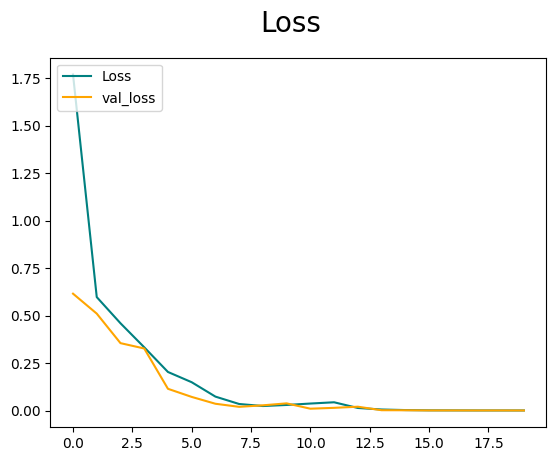

In [62]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='teal',label='Loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()

# Evaluate Performance

In [63]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [65]:
prec=Precision()
rec=Recall()
acc=BinaryAccuracy()

In [66]:
len(test)

1

In [67]:
for batch in test.as_numpy_iterator():
    x,y=batch
    y_pred=model.predict(x)
    prec.update_state(y,y_pred)
    rec.update_state(y,y_pred)
    acc.update_state(y,y_pred)

1/1 [==============================] - 22s 22s/step


In [70]:
print(f'Precision:{prec.result().numpy()}, Recall:{rce.result().numpy()}, Accuracy:{acc.result().numpy()})

SyntaxError: EOL while scanning string literal (2206248094.py, line 1)

**Test**

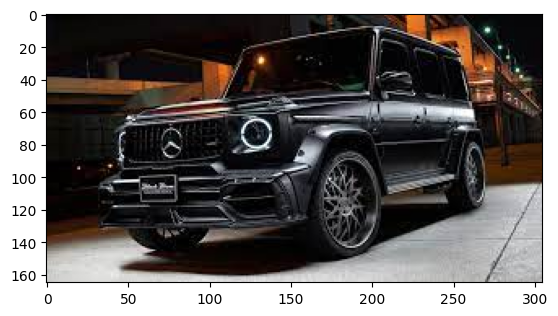

In [83]:
img=cv2.imread('C:/Users/Pearry/NoteBooks/download (1).jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


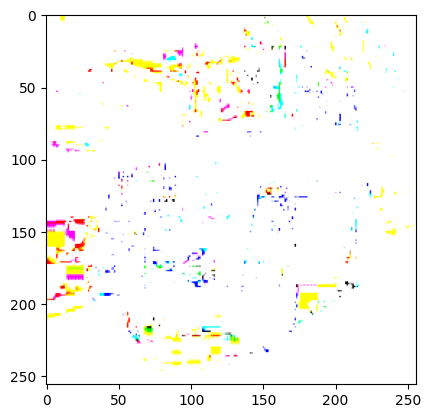

In [84]:
resize=tf.image.resize(img,(256,256))
plt.imshow(cv2.cvtColor(resize.numpy(),cv2.COLOR_BGR2RGB))
plt.show()

In [85]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [87]:
pred=model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 7s 7s/step


In [88]:
pred

array([[0.7361735]], dtype=float32)

# Save The Model

In [89]:
from tensorflow.keras.models import load_model

In [91]:
model.save(os.path.join('C:/Users/Pearry/NoteBooks/models/','Audi_Merc_Diff.h5'))

In [92]:
new_model=load_model(os.path.join('C:/Users/Pearry/NoteBooks/models/','Audi_Merc_Diff.h5'))

In [94]:
new_pred=new_model.predict(np.expand_dims(resize/255,0 ))

1/1 [==============================] - 24s 24s/step


In [ ]:
if new_pred>0.5:
    print(f'Mercedez Benz')
    else:
        print('audi')